In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Load mpg dataset and prepare for classification

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# remove null values
df = df.dropna()

# ML-preparation: Features and Target

In [31]:
X = df[['mpg', 'weight']]
y = df['origin']

# ML-preparation: Perform Train-Test-Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeling: Create Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.620253164556962

# Visualize Results

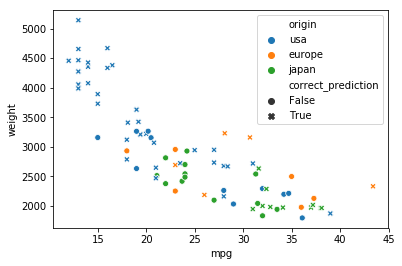

In [34]:
df_viz = pd.DataFrame(X_test).copy()
df_viz['origin'] = y_test
df_viz['prediction'] = clf.predict(X_test)
df_viz['correct_prediction'] = (df_viz.origin == df_viz.prediction)
sns.scatterplot(data=df_viz, x='mpg', y='weight', hue='origin', style='correct_prediction'); plt.show()

# Improve Scoring by Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print(scores.mean())

[0.875      0.925      0.875      0.8        0.85       0.82051282
 0.82051282 0.82051282 0.68421053 0.67567568]
0.8146424663529925


# Search for Optimal Parameter by Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid
# the pipeline stage is followed by two underscores "__" and then the parameter to be varied is named (as key)
# the value is a list of parameter values to be searched
param_grid = [
    {'max_depth': range(1, 21)}
]

search = GridSearchCV(clf, param_grid, cv=10)

search.fit(X, y)
print("Best parameter (CV score={:.2f}):{})".format(search.best_score_, search.best_params_))

Best parameter (CV score=0.84):{'max_depth': 14})


C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
import graphviz 
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("mpg") 

## Visualize Results of Grid-Search

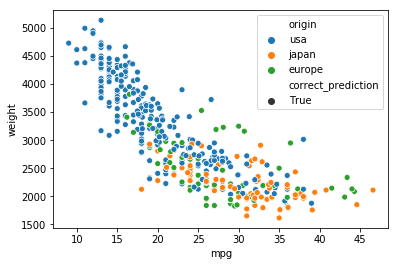

In [10]:
df_viz = pd.DataFrame(X).copy()
df_viz['origin'] = y
df_viz['prediction'] = search.predict(X)
df_viz['correct_prediction'] = (df_viz.origin == df_viz.prediction)
sns.scatterplot(data=df_viz, x='mpg', y='weight', hue='origin', style='correct_prediction'); plt.show()

# Add further features

In [11]:
X_all_features = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y_all_features = df['origin']

In [12]:
clf = DecisionTreeClassifier()

search_all_features = GridSearchCV(clf, param_grid, cv=10)
search_all_features.fit(X_all_features, y_all_features)
print("Best parameter (CV score={:.2f}):{})".format(search_all_features.best_score_, search.best_params_))

Best parameter (CV score=0.84):{'max_depth': 16})


C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Visualize final model in pairplot

C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\peer.kueppers\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: inva

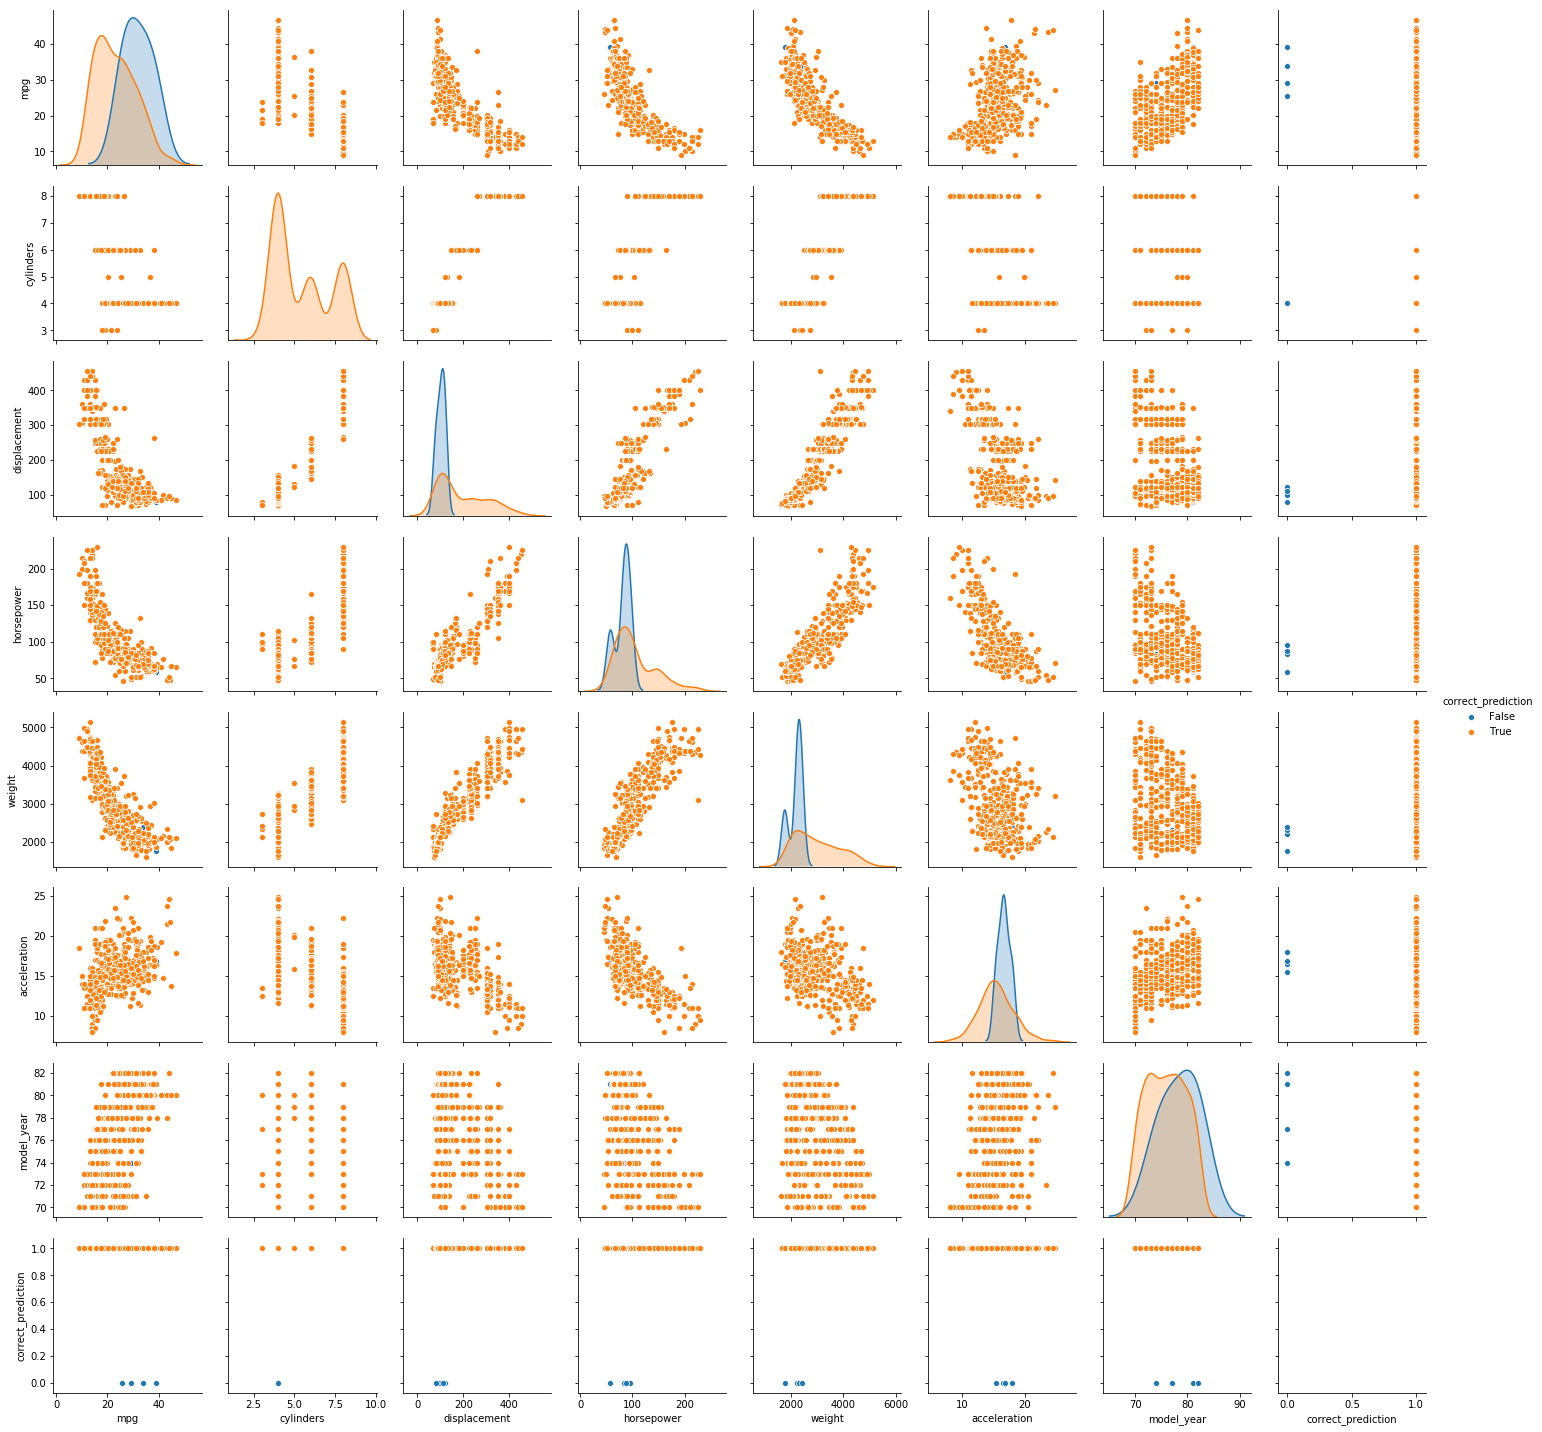

In [13]:
df_viz = pd.DataFrame(X_all_features).copy()
df_viz['origin'] = y_all_features
df_viz['prediction'] = search_all_features.predict(X_all_features)
df_viz['correct_prediction'] = (df_viz.origin == df_viz.prediction)
sns.pairplot(data=df_viz, hue='correct_prediction'); plt.show()

# Visualization of the Decision Boundary

In [14]:
from sklearn.preprocessing import MinMaxScaler  # in order to understand the decision boundary, we'll normalize our data

X = MinMaxScaler().fit_transform(df[['mpg', 'horsepower']])
y = df['origin'].map({'usa':1, 'europe':2, 'japan':3})  # the visualization below cannot work with nominal values

clf_arr = []  # this array holds the knn-predictors
clf_name_arr = []  # this array holds the names of the knn-predictors for visualization
for i in range(9):
    max_depth = 1
    if(i>0):
        max_depth = i*2
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X, y)
    clf_arr.append(clf)
    clf_name_arr.append("Decision Tree (max depth={})".format(max_depth))


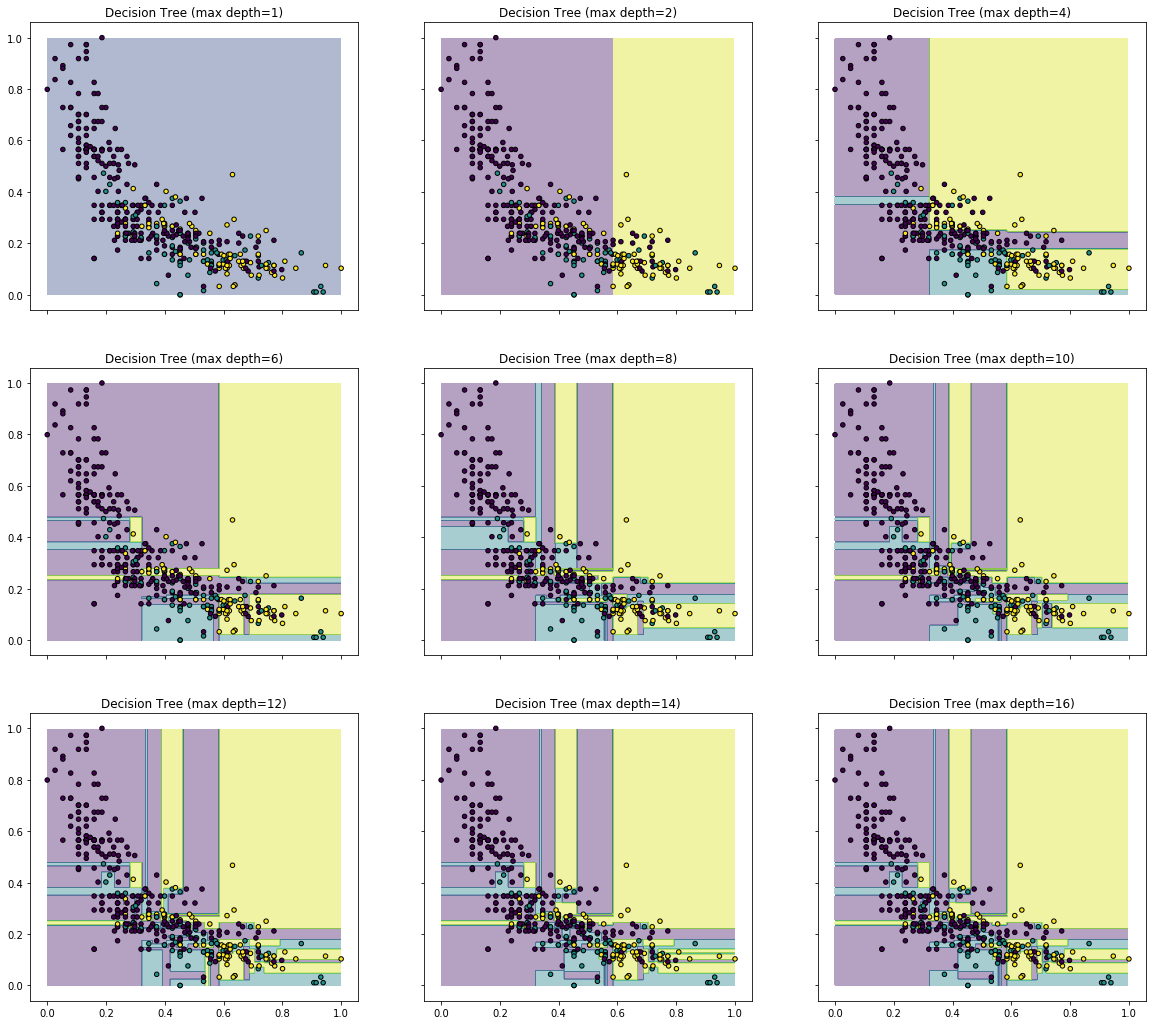

In [16]:
# for the approach, see https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

from itertools import product

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min(), X[:, 0].max()  # this is always 0,1 if MinMaxSclaer is used
y_min, y_max = X[:, 1].min(), X[:, 1].max() # this is always 0,1 if MinMaxSclaer is used
steps = 300  # --> looks better if larger
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/steps),
                     np.arange(y_min, y_max, (y_max-y_min)/steps))  


f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 18))

# for each model, create the decision boundary and plot it into the right sub-plot (via idx)
for idx, clf, tt in zip(product([0,1,2], [0,1,2]), clf_arr, clf_name_arr):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # predict the mesh
       
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)  # draw decision boundary
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')  # plot the original data (normalized)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [18]:
# by the way: the scaler needs to be applied for predictions
clf_arr[3].predict([[0.98, 0.01]])# MinMaxScaler().fit_transform([[800, 70]]))

array([2], dtype=int64)

# Evaluate the Decision Tree

In [50]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier()

# define the parameter grid
# the pipeline stage is followed by two underscores "__" and then the parameter to be varied is named (as key)
# the value is a list of parameter values to be searched
param_grid = [
    {'max_depth': range(1, 21)}
]

search = GridSearchCV(clf, param_grid, cv=10)

search.fit(X_train, y_train)
print("Best parameter (CV score={:.2f}):{})".format(search.best_score_, search.best_params_))

Best parameter (CV score=0.69):{'max_depth': 3})


C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
y_pred = search.predict(X_test)

In [55]:
confusion_matrix(y_test, y_pred)

array([[39,  0,  3],
       [13,  1,  0],
       [14,  1,  8]], dtype=int64)

# Plot the Decision Tree

In [1]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(28, 30), dpi=120, facecolor='w', edgecolor='k')
plot_tree(clf_arr[1], filled=True);plt.show()

ImportError: cannot import name 'plot_tree'

In [60]:
clf_arr[1].predict_proba([[0.6, 0.2]])# MinMaxScaler().fit_transform([[800, 70]]))

array([[0.2278481 , 0.18987342, 0.58227848]])